# Intensity Transformations and Neighborhood Filtering

#### Index No : 200064C

#### Name  : Bandara.H.M.S.D

1.  Implement the intensity transformation depicted in Fig. 1a on the image shown in Fig. 1b. 

In [11]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math

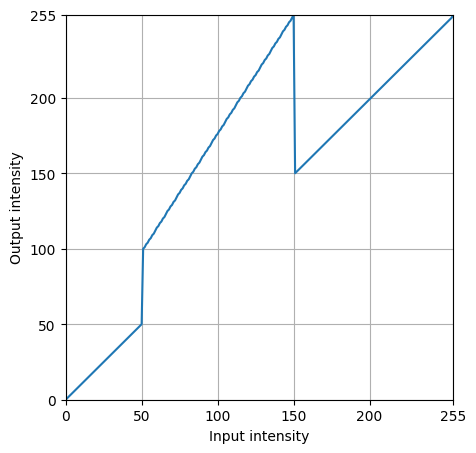

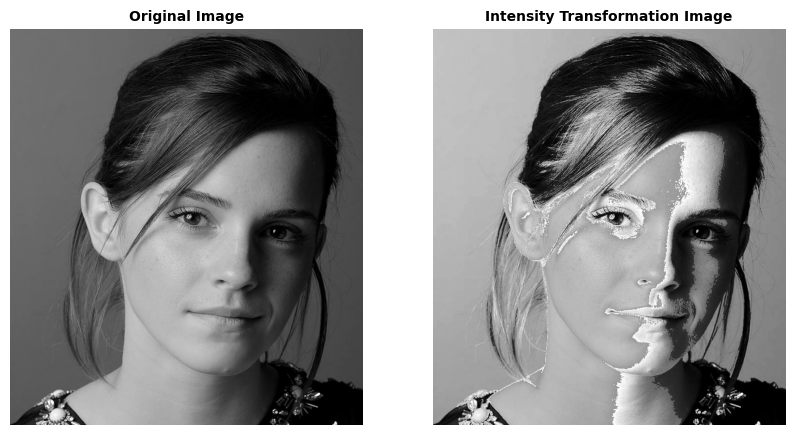

In [26]:
t1=np.linspace(0,50,51).astype('uint8')
t2=np.linspace(100,255,100).astype('uint8')
t3=np.linspace(150,255,105).astype('uint8')

# Generate the transformation
transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')

label = [0, 50, 100,150, 200,255]

# Plot the transformation
plt.figure(figsize = (5,5))
plt.plot(transform)
plt.grid('on')
plt.xlim([0, 255])
plt.ylim([0, 255])
plt.xticks(label)
plt.yticks(label)
plt.xlabel('Input intensity')
plt.ylabel('Output intensity')

# Import Image
img_orig =cv.imread('emma.jpg' , cv.IMREAD_GRAYSCALE)
img_transformed=cv.LUT(img_orig,transform) # Apply the transformation to the image

f, ax=plt.subplots(1,2,figsize = (10,10))
img_orig=cv.cvtColor(img_orig,cv.COLOR_BGR2RGB)
img_transformed=cv.cvtColor(img_transformed,cv.COLOR_BGR2RGB)

# Plot the original and the transfromed image
ax[0].imshow(img_orig)
ax[0].set_title('Original Image',fontweight ="bold",fontsize = 10)
ax[0].axis('off')
ax[1].imshow(img_transformed)
ax[1].set_title('Intensity Transformation Image',fontweight ="bold",fontsize = 10)
ax[1].axis('off')
plt.show()

** Through this process, the pixels possessing a grayscale value ranging from 50 to 150 are highlighted by amplifying their brightness in contrast to the remaining pixels. As a result, the pixels with grayscale values falling within the 50-150 range appear brighter in the altered image.

2.  Apply a similar operation as above (question 1) to accentuate
(a) white matter
(b) gray matter
in the brain proton density image shown in Fig. 2. Show the intensity transformations as a plots.

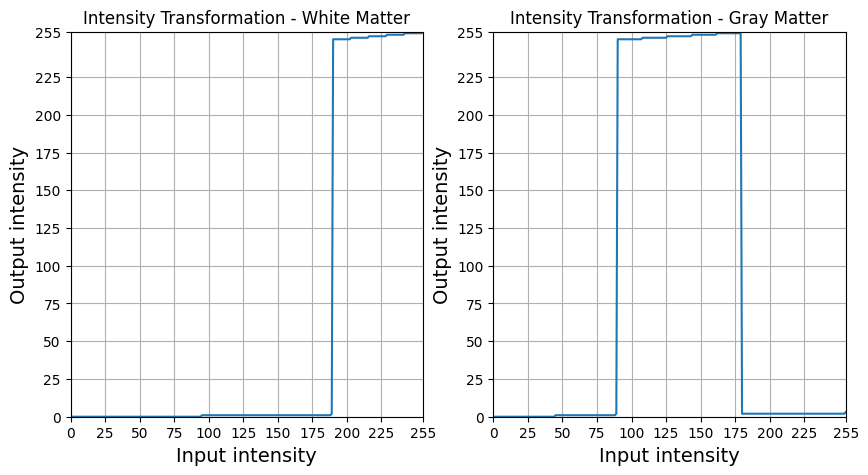

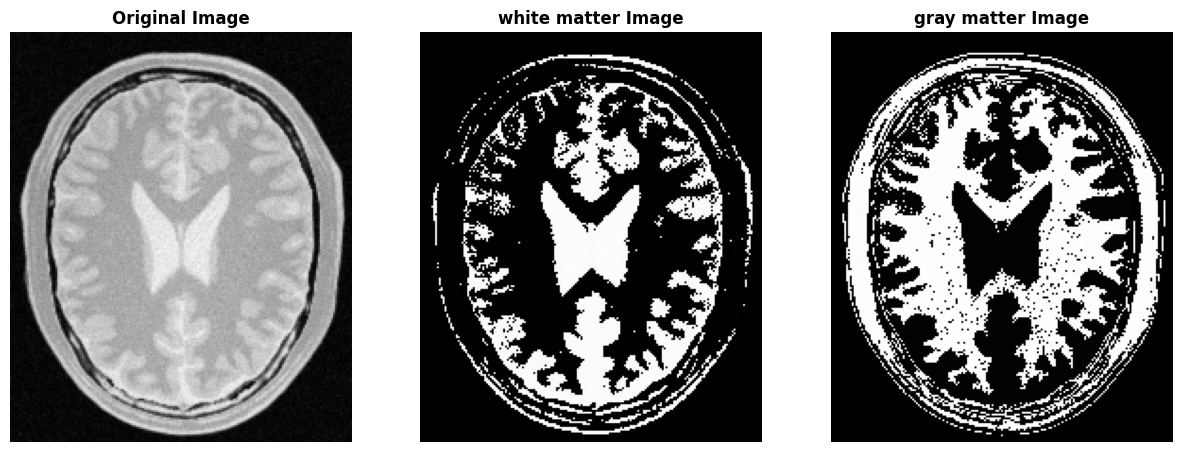

In [27]:
# Transformation for white matter
t1=np.linspace(0,2,190).astype('uint8')
t2=np.linspace(250,255,66).astype('uint8')
white = np.concatenate((t1, t2 ), axis=0).astype('uint8')

# Transformation for gray matter
p1=np.linspace(0,2,90).astype('uint8')
p2=np.linspace(250,255,90).astype('uint8')
p3=np.linspace(2,3,76).astype('uint8')
gray = np.concatenate((p1, p2 , p3), axis=0).astype('uint8')


label = [0, 25,50,75, 100,125,150,175, 200,225,255]

# Plot the transformation
f, ax=plt.subplots(1,2,figsize = (10,5))
ax[0].plot(white)
ax[0].set_title('Intensity Transformation - White Matter', fontsize = 12)
ax[0].grid('on')
ax[0].set_xlim([0, 255])
ax[0].set_ylim([0, 255])
ax[0].set_xticks(label)
ax[0].set_yticks(label)
ax[0].set_xlabel('Input intensity', fontsize = 14)
ax[0].set_ylabel('Output intensity', fontsize = 14)

ax[1].plot(gray)
ax[1].set_title('Intensity Transformation - Gray Matter', fontsize = 12)
ax[1].grid('on')
ax[1].set_xlim([0, 255])
ax[1].set_ylim([0, 255])
ax[1].set_xticks(label)
ax[1].set_yticks(label)
ax[1].set_xlabel('Input intensity', fontsize = 14)
ax[1].set_ylabel('Output intensity', fontsize = 14)

# Import the image
img_orig =cv.imread('BrainProtonDensitySlice9.png' , cv.IMREAD_GRAYSCALE)
assert img_orig is not None
# Apply the transformation to the image
img_white=cv.LUT(img_orig,white)
img_gray=cv.LUT(img_orig,gray)

f, ax=plt.subplots(1,3,figsize = (15,8))
img_orig=cv.cvtColor(img_orig,cv.COLOR_BGR2RGB)
img_white=cv.cvtColor(img_white,cv.COLOR_BGR2RGB)
img_gray=cv.cvtColor(img_gray,cv.COLOR_BGR2RGB)

# Plot the original and the transfromed image
ax[0].imshow(img_orig)
ax[0].set_title('Original Image',fontweight ="bold",fontsize = 12)
ax[0].axis('off')
ax[1].imshow(img_white)
ax[1].set_title('white matter Image',fontweight ="bold",fontsize = 12)
ax[1].axis('off')
ax[2].imshow(img_gray)
ax[2].set_title('gray matter Image',fontweight ="bold",fontsize = 12)
ax[2].axis('off')

plt.show()

**
In order to enhance the visibility of white matter, the transformation is formulated to yield pure white in pixels that are very close to being white. This is achieved by focusing on the grayscale range of 190-255.
Similarly, to highlight the gray matter, the transformation is structured to result in pure white pixels within the gray range for improved visualization. This is applicable to grayscale values between 90-180.
In both scenarios, the unwanted gray levels remain unchanged, retaining their original grayscale values.

3. . Consider the image shown in Fig. 3
(a) Apply gamma correction to the L plane in the L∗a∗b∗color space and state the γ value.
(b) Show the histograms of the original and corrected images.


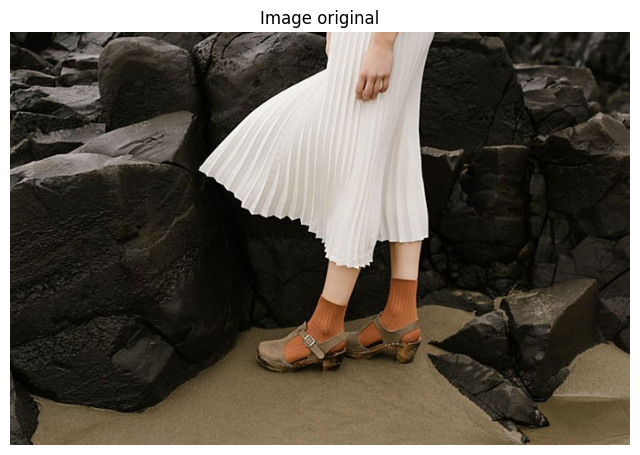

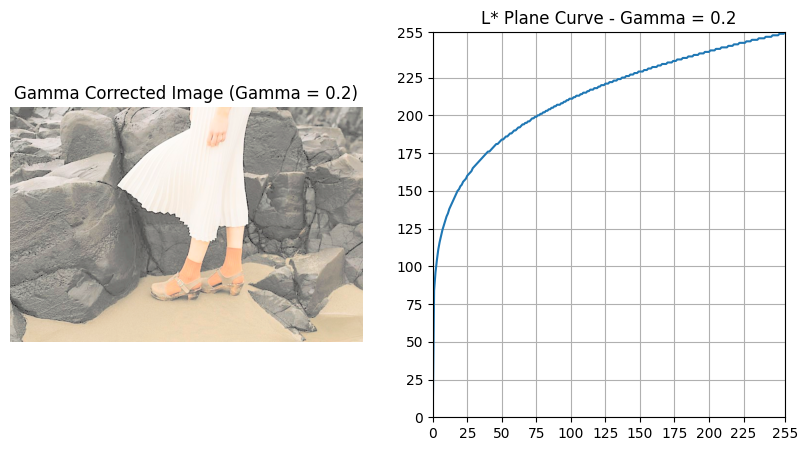

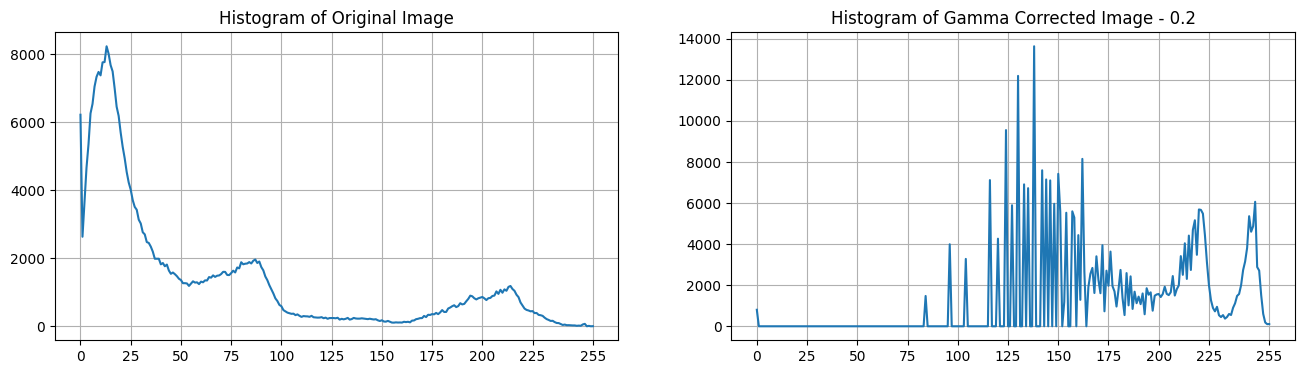

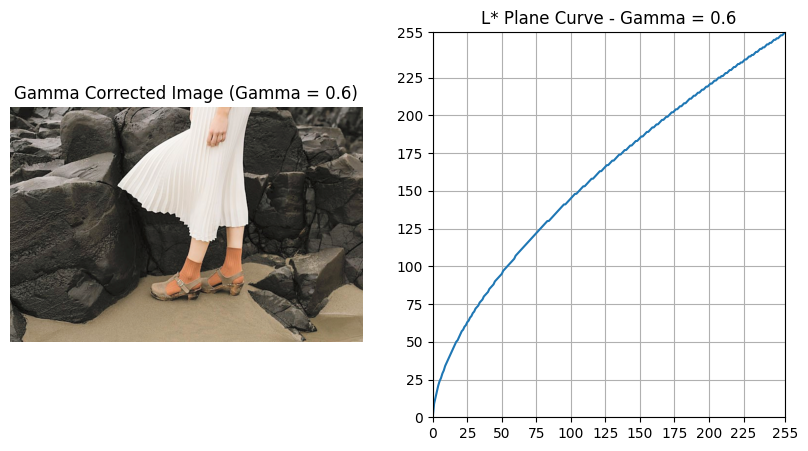

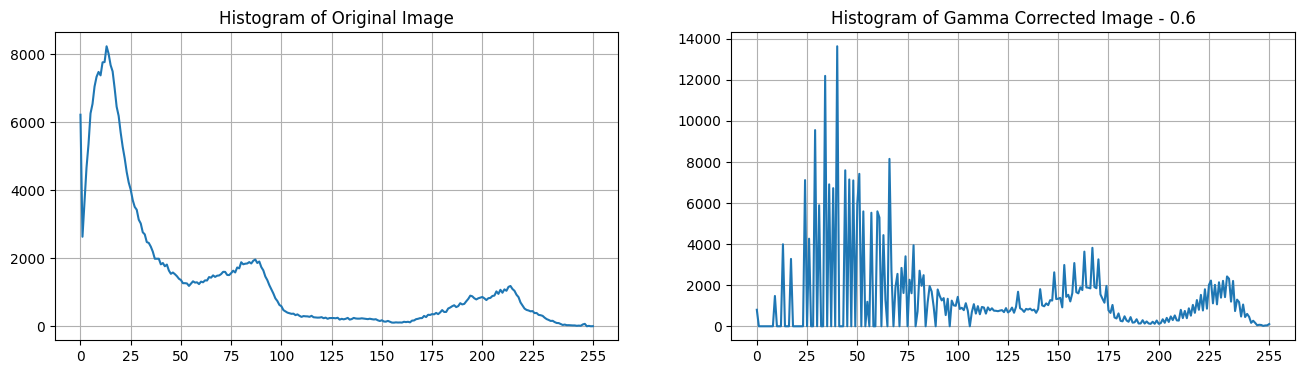

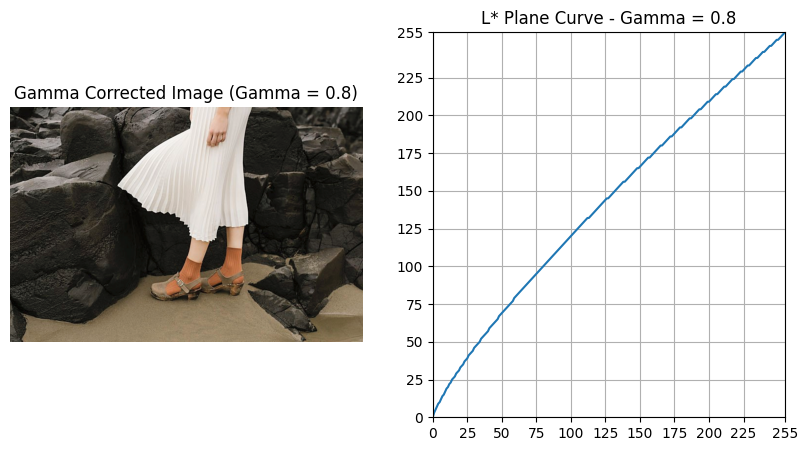

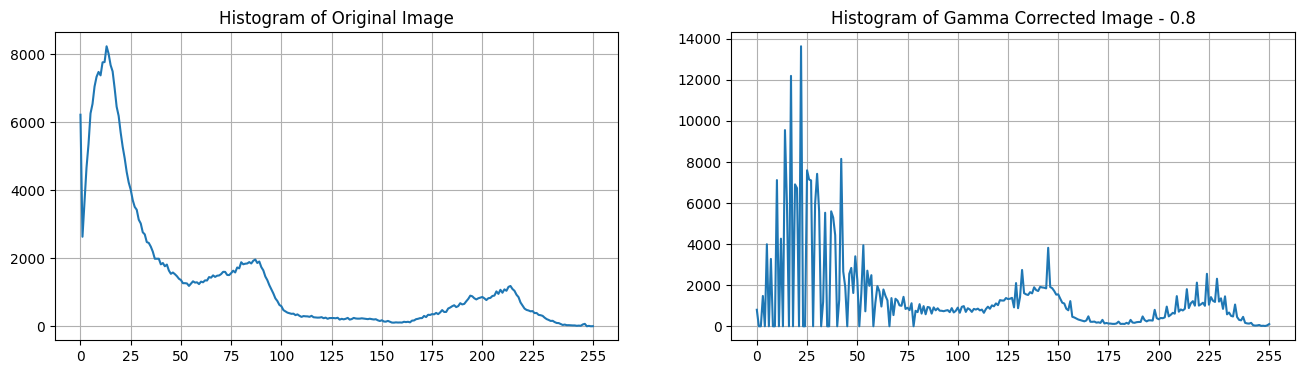

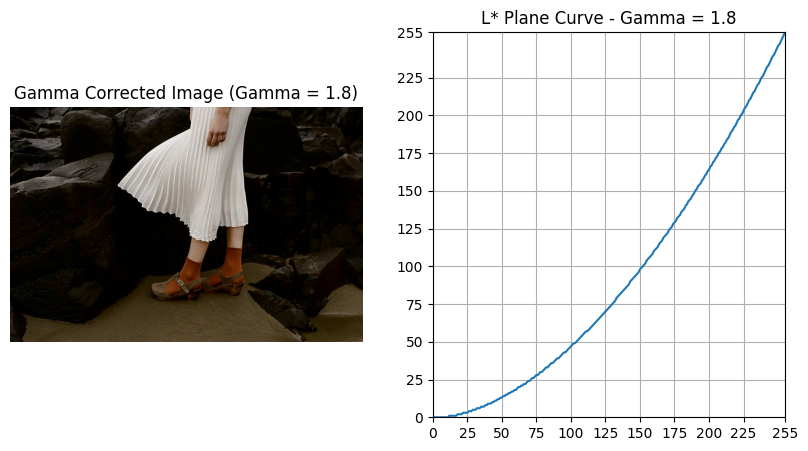

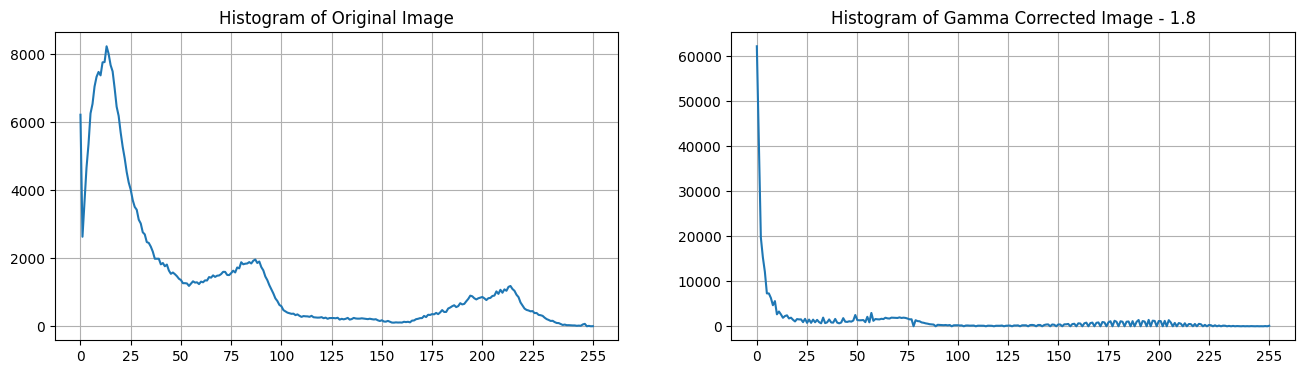

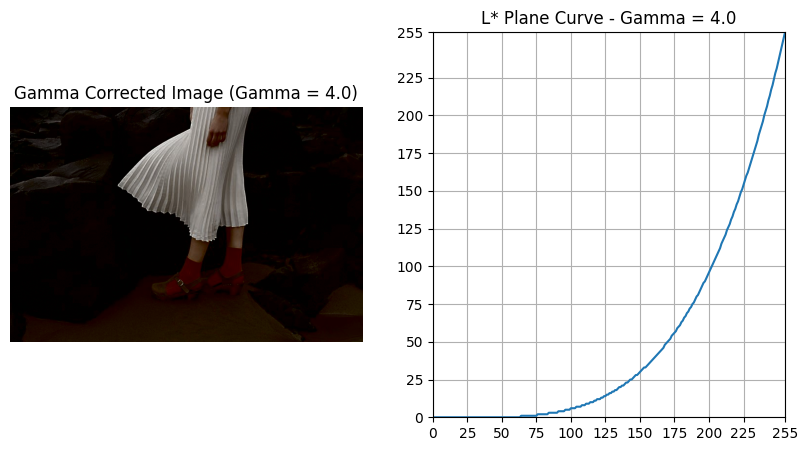

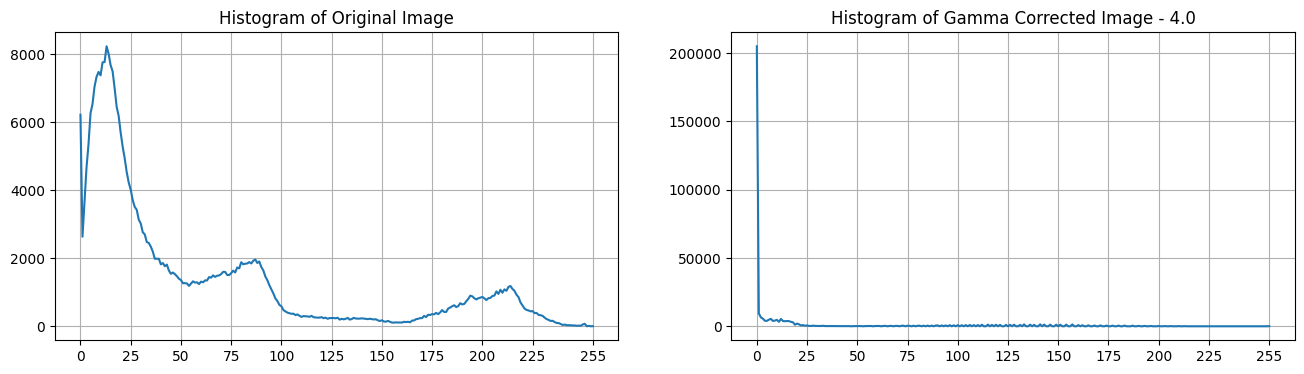

In [28]:
# Import the image
img_orig = cv.imread('highlights_and_shadows.jpg')
assert img_orig is not None

img = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)    # Convert BGR image to RGB and display the original image
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img)
ax.set_title('Image original')
ax.axis('off')

lab_image = cv.cvtColor(img_orig, cv.COLOR_BGR2Lab)  # Convert to L*a*b* color space
L_channel,A_channel,B_channel = cv.split(lab_image)

label = [0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 255]
hist_g = []
gamma = [0.2, 0.6, 0.8, 1.8, 4.0]

# Iterate through different gamma values
for g in gamma:
    table = np.array([(i / 255.0) ** g * 255.0 for i in np.arange(0, 256)]).astype('uint8')  # Create a lookup table for gamma correction
    img_gamma = cv.LUT(L_channel, table)           # Apply gamma correction to the L* channel
    lab_image= cv.merge([img_gamma,A_channel,B_channel]).astype('uint8')   # Merge the gamma-corrected L* channel with A* and B* channels
    
    # Calculate histograms for original and gamma-corrected images
    hist_f = cv.calcHist([img_orig], [0], None, [256], [0,256])
    hist_g=cv.calcHist([lab_image], [0], None, [256], [0,256])

    corrected_image = cv.cvtColor(lab_image, cv.COLOR_Lab2RGB)  # Convert Lab to BGR
    
     # Display histograms of the original and gamma-corrected images
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(corrected_image)
    ax[0].set_title("Gamma Corrected Image (Gamma = " + str(g) + ")")
    ax[0].axis('off')

    ax[1].plot(table)
    ax[1].set_title("L* Plane Curve - Gamma = " + str(g))
    ax[1].set_xlim(0, 255)
    ax[1].set_ylim(0, 255)
    ax[1].set_xticks(label)
    ax[1].set_yticks(label)
    ax[1].grid('on')

    fig, ax = plt.subplots(1, 2, figsize=(16, 4))
    ax[0].plot(hist_f)
    ax[0].set_title("Histogram of Original Image")
    ax[0].set_xticks(label)
    ax[0].grid('on')

    ax[1].plot(hist_g)
    ax[1].set_title("Histogram of Gamma Corrected Image - " + str(g))
    ax[1].set_xticks(label)
    ax[1].grid('on')
    plt.show()

Gamma value = 0.8

4. Increasing the vibrance of a photograph is probably achieved by applying an intensity transformation such as
f (x) = min(x+a * 128e^((x−128)^2)/2σ2, 255),
to the saturation plane, where x is the input intensity, a ∈ [0,1] and σ = 70. 
(a) Split the image shown in Fig. 4 into hue, saturation, and value planes.
(b) Apply the aforementioned intensity transformation to the saturation plane.
(c) Adjust a to get a visually pleasing output. Report the value of a.
(d) Recombine the three planes.
(e) Display the original image, vibrance-enhanced image, and the intensity transformation.


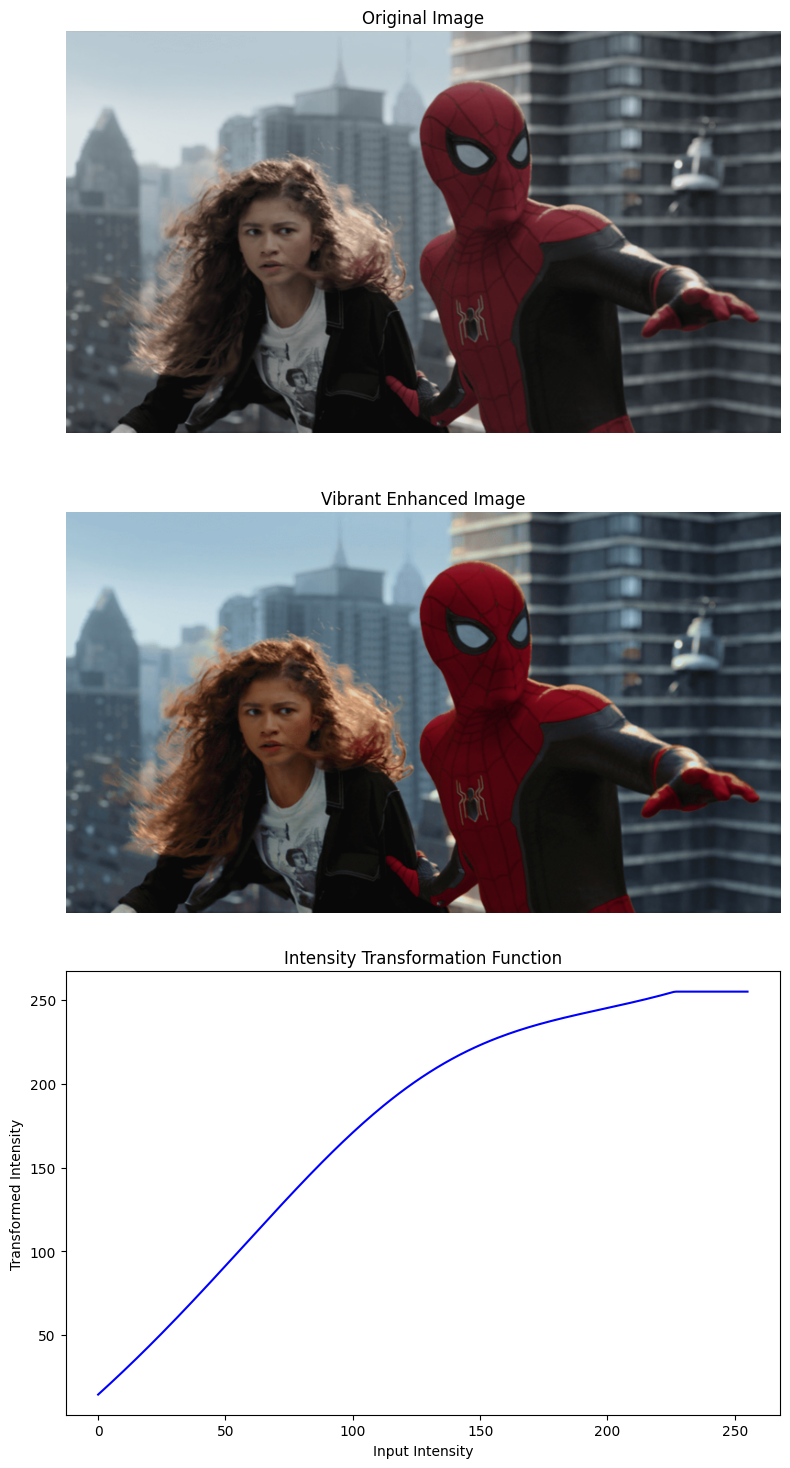

In [18]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def intensity_transformation(x, a, sigma):
    return np.minimum(x + (a * 128) *( np.exp(-((x - 128) ** 2) / (2 * sigma ** 2))), 255)

# Load an image
image = cv.imread("spider.png")  # Replace with your image path

# Convert the image to HSV color space
hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)

# Extract the saturation channel
saturation_channel = hsv_image[:, :, 1]

# Define parameters for the intensity transformation
a = 0.6  # Modify as needed
sigma = 70  # Modify as needed

# Apply the intensity transformation to the saturation channel
transformed_saturation = np.vectorize(intensity_transformation)(saturation_channel, a, sigma)

# Update the saturation channel in the HSV image
hsv_image[:, :, 1] = transformed_saturation

# Convert the modified HSV image back to BGR color space
modified_image = cv.cvtColor(hsv_image, cv.COLOR_HSV2BGR)

x = np.arange(0, 256)
y = np.arange(0, 256)
X, Y = np.meshgrid(x, y)

# Display the original and modified images
plt.figure(figsize=(8,15))

plt.subplot(3, 1, 1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(3, 1,  2)
plt.imshow(cv.cvtColor(modified_image, cv.COLOR_BGR2RGB))
plt.title('Vibrant Enhanced Image')
plt.axis('off')

plt.subplot(3, 1,  3)
transformation_curve = intensity_transformation(x, a, sigma)
plt.plot(x, transformation_curve,color='blue')
plt.title('Intensity Transformation Function')
plt.xlabel('Input Intensity')
plt.ylabel('Transformed Intensity')

plt.tight_layout()
plt.show()


5. . Write a function of your own to carry out histogram equalization on the image shown in Fig. 5. Show the histograms before and after equalization. 

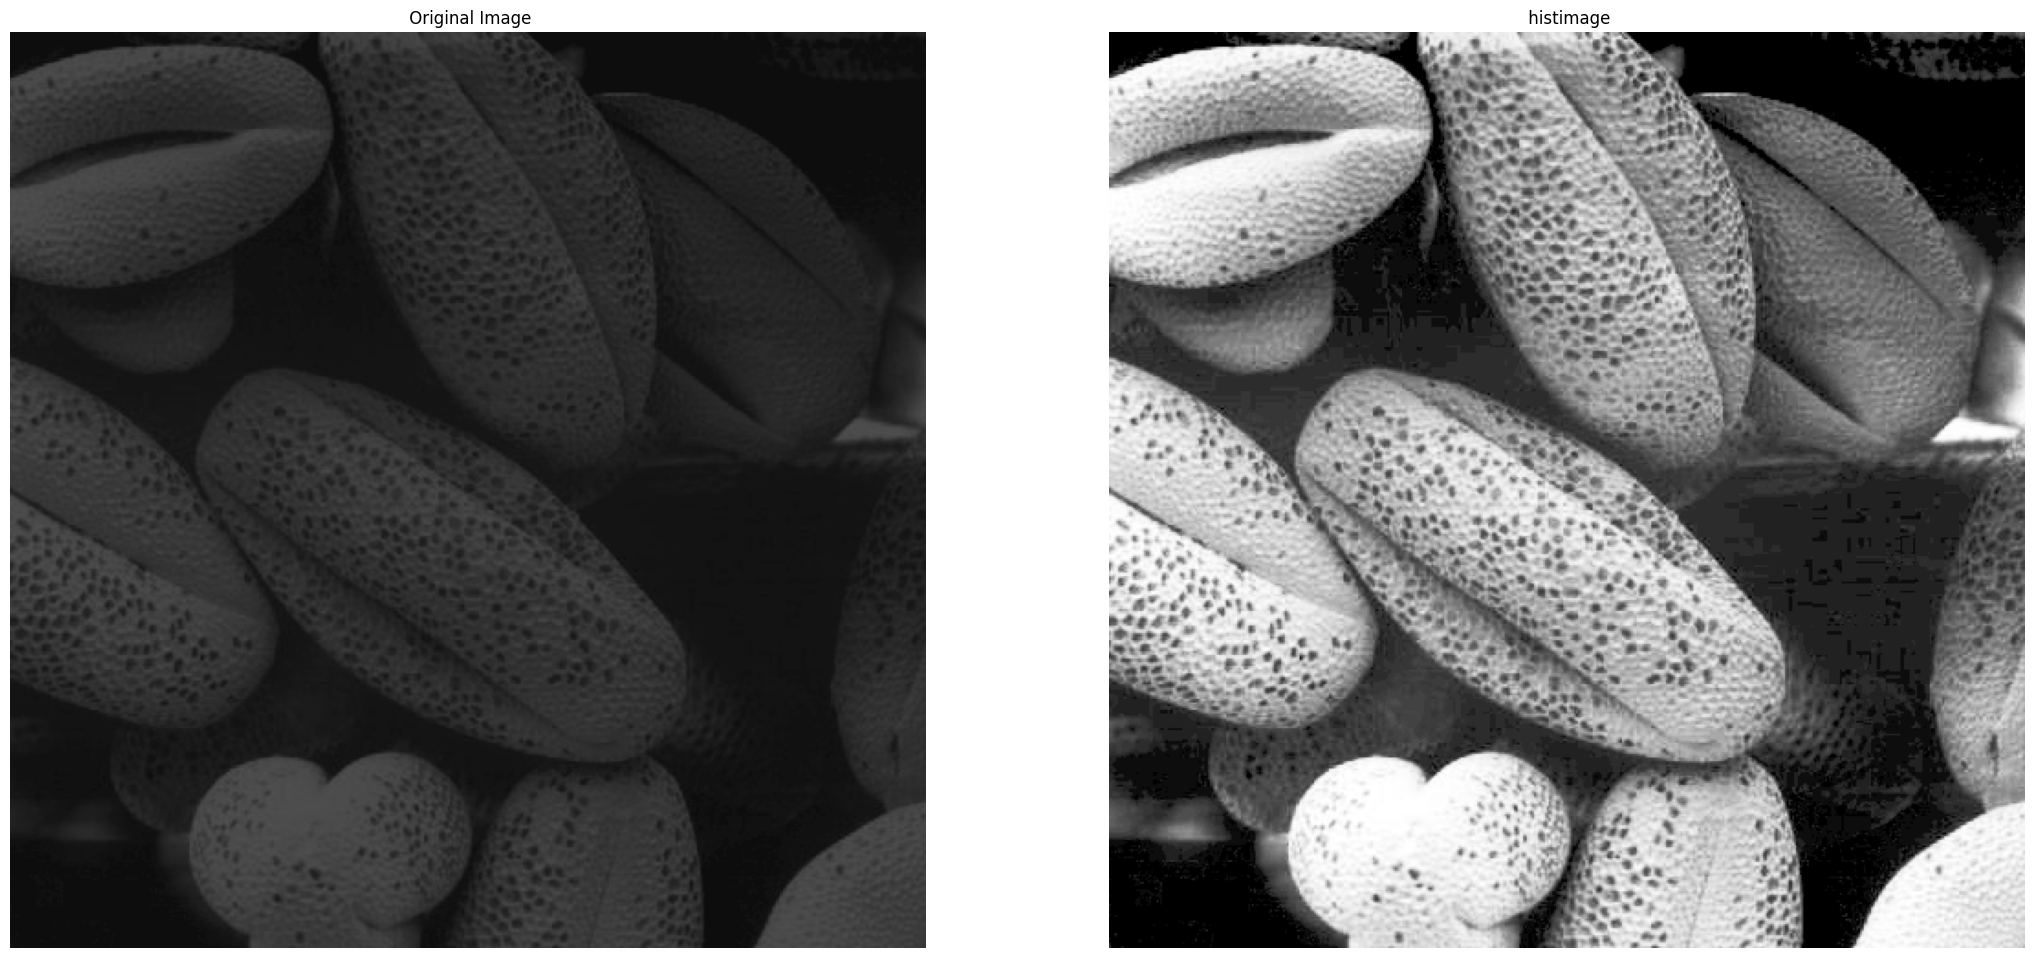

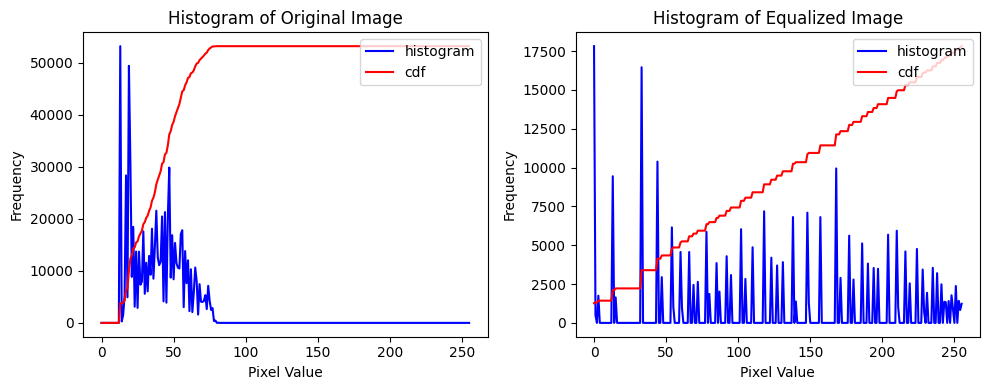

In [39]:
def histogram_equalization(image):
    # Convert the image to grayscale if it's in color
    if len(image.shape) == 3:
        image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

    # Apply histogram equalization
    equalized_image = cv.equalizeHist(image)

    return equalized_image

# Load the image
image_path = 'shells.tif'
image = cv.imread(image_path)

# Perform histogram equalization
equalized_image = histogram_equalization(image)

# Calculate histograms for both original and equalized images
hist_original, _ = np.histogram(image.flatten(), bins=256, range=[0,256])
cdf1 = hist_original.cumsum()
cdf_original = cdf1 * hist_original.max()/ cdf1.max()
hist_equalized, _ = np.histogram(equalized_image.flatten(), bins=256, range=[0,256])
cdf2 = hist_equalized.cumsum()
cdf_normalized = cdf2 * hist_equalized.max()/ cdf2.max()
# Display the histograms
fig, ax = plt.subplots(1, 2, figsize=(26, 13))

# Display histograms and cumulative distribution functions
ax[0].imshow(cv.cvtColor(image ,cv.COLOR_BGR2RGB))
ax[0].set_title(" Original Image")
ax[0].axis("off")

ax[1].imshow(cv.cvtColor(equalized_image ,cv.COLOR_BGR2RGB))
ax[1].set_title(" histimage")
ax[1].axis("off")


plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.title('Histogram of Original Image')
plt.plot(hist_original, color='b')
plt.plot(cdf_original, color = 'r')
plt.legend(('histogram','cdf'), loc = 'upper right')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(122)
plt.title('Histogram of Equalized Image')
plt.plot(hist_equalized, color ='b')
plt.plot(cdf_normalized, color = 'r')
plt.legend(('histogram','cdf'), loc = 'upper right')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


6.  In this question, we will apply histogram equalization only to the foreground of an image to produce an
image with a histogram equalized foreground. 
(a) Open the image in Fig. 6, split it into hue, saturation, and values and display these planes in grayscale.
(b) Select the appropriate plane to threshold in extract the foreground mask. A mask is a binary image.
(c) Now obtain the foreground only using cv.bitwise_and and compute the histogram.
(d) Obtain the cumulative sum of the histogram using np.cumsum.
(e) Use the formulas in slides to histogram-equalize the foreground.
(f) Extract the background and add with the histogram equalized foreground.
Show the hue, saturation, and value plane, the mask, the original image, and the result with the histogram equalized foreground.

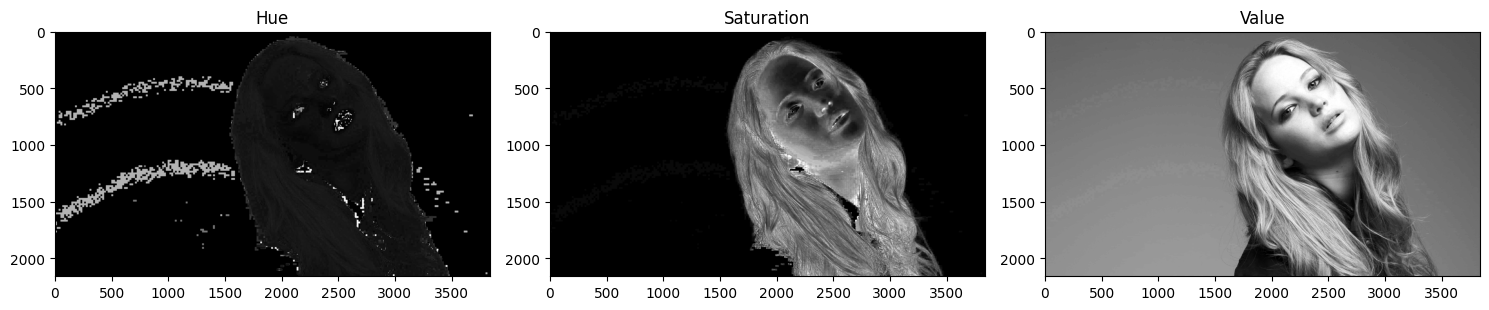

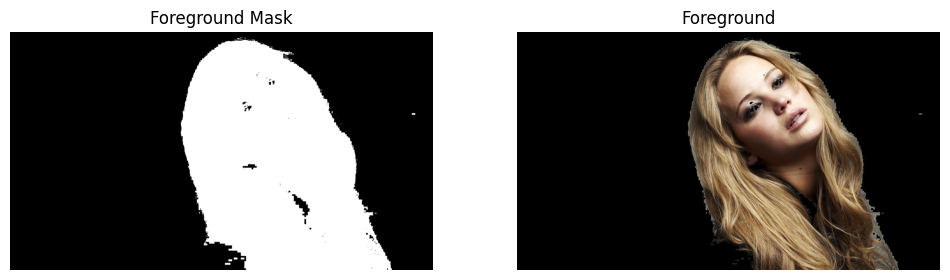

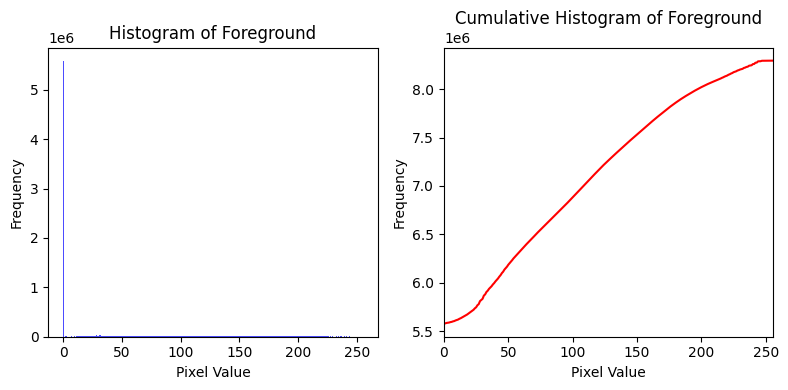

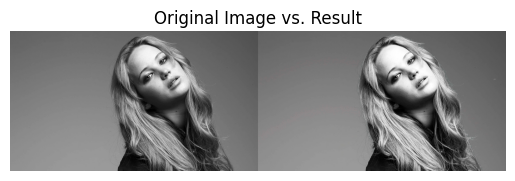

In [31]:
# Load the image
image = cv.imread('jeniffer.jpg')
assert image is not None

hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)   # Convert the image to hsv color space

hue, saturation, value = cv.split(hsv_image)
# Display hue, saturation, and value planes in grayscale
plt.figure(figsize=(15, 5))
plt.subplot(131), plt.imshow(hue, cmap='gray'), plt.title('Hue')
plt.subplot(132), plt.imshow(saturation, cmap='gray'), plt.title('Saturation')
plt.subplot(133), plt.imshow(value, cmap='gray'), plt.title('Value')
plt.tight_layout()
plt.show()

# Threshold to create the foreground mask
threshold_value = 12  # Adjust as needed
_, foreground_mask = cv.threshold(saturation, threshold_value, 255, cv.THRESH_BINARY)

# Display the foreground mask
plt.figure(figsize=(12, 4))
plt.subplot(121),plt.imshow(foreground_mask, cmap='gray'),plt.title('Foreground Mask'),plt.axis('off')

# Extract the foreground region using cv2.bitwise_and
foreground = cv.bitwise_and(image, image, mask=foreground_mask)
plt.subplot(122),plt.imshow(cv.cvtColor(foreground, cv.COLOR_BGR2RGB)),plt.title('Foreground'),plt.axis('off')
plt.show()

# Compute the histogram of the foreground region
foreground_gray = cv.cvtColor(foreground, cv.COLOR_BGR2GRAY)
hist, bins = np.histogram(foreground_gray.ravel(), bins=256, range=[0, 255])

# Compute the cumulative histogram of the foreground region
cumulative_histogram = hist.cumsum()

# Plot the histogram using plt.hist
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.title('Histogram of Foreground')
plt.hist(foreground_gray.flatten(), bins=256, range=[0, 255], color='b', alpha=0.7)
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
#plt.hist(foreground.ravel(), 256, [0, 256])

plt.subplot(122)
plt.title('Cumulative Histogram of Foreground')
plt.plot(cumulative_histogram, color='r')
plt.xlim([0, 256])
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Equalize the histogram of the foreground
equalized_foreground_gray = cv.equalizeHist(foreground_gray).astype(np.uint8)
equalized_foreground = cv.cvtColor(equalized_foreground_gray, cv.COLOR_GRAY2BGR)

background_mask = cv.bitwise_not(foreground_mask)   # Create a background mask by inverting the foreground mask
background = cv.bitwise_and(image, image, mask=background_mask)    # Extract the background using cv2.bitwise_and
result = cv.add(equalized_foreground, background)     # Combine the equalized foreground and background

# Display the original image and the resulting image side by side
img=cv.cvtColor(image, cv.COLOR_BGR2GRAY)
img2 = cv.cvtColor(img, cv.COLOR_BGR2RGB)
output = np.hstack((img2, result)) 
plt.axis('off')
plt.imshow(output, cmap='gray')
plt.title('Original Image vs. Result')
plt.show()



(7)Filtering with the Sobel operator can compute the gradient. Consider the image shown in Fig. 7 
a)Using the existing filter2D to Sobel filter the image.


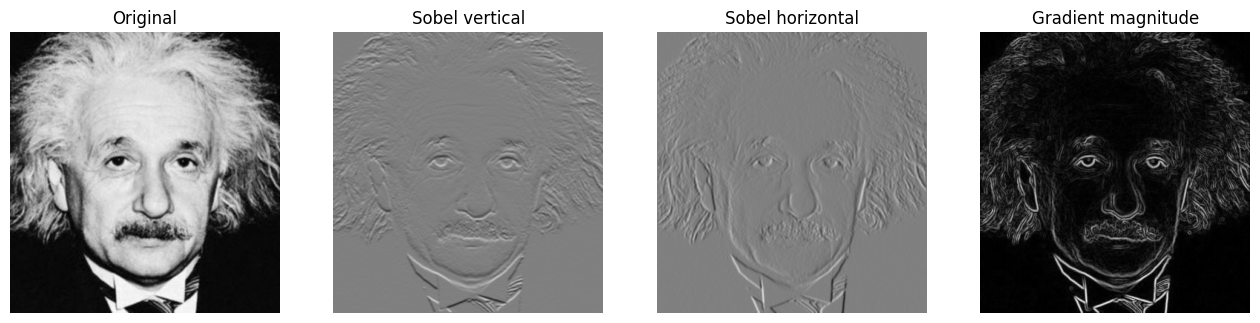

In [33]:
# Load the grayscale image
im = cv.imread("einstein.png", cv.IMREAD_GRAYSCALE).astype(np.float32)
assert im is not None

sobel_v = np.array([[-1 , -2, -1] , [0 ,0 , 0] , [1 , 2, 1] ], dtype=np.float32)
f_x = cv.filter2D(im, -1, sobel_v)     # Apply the vertical Sobel filter to the image
sobel_h = np.array([[-1 , 0, 1] , [-2 ,0 , 2] , [-1 , 0, 1] ], dtype=np.float32)
f_h = cv.filter2D(im, -1, sobel_h)    # Apply the horizontal Sobel filter to the image

grad_mag = np.sqrt(f_x**2 + f_h**2)    # Compute the gradient magnitude using the filtered results

# Display the original grayscale image , image filtered with the vertical Sobel operator, image filtered with the horizontal Sobel operator, and the gradient magnitude
fig, ax = plt.subplots(1, 4, figsize=(16, 16))
ax[0].imshow(im, cmap = 'gray', vmin = 0, vmax = 255),ax[0].set_title("Original"),ax[0].axis('off')
ax[1].imshow(f_x, cmap = 'gray', vmin = -1020, vmax = 1020),ax[1].set_title("Sobel vertical"),ax[1].axis('off')
ax[2].imshow(f_h, cmap = 'gray', vmin = -1020, vmax = 1020),ax[2].set_title("Sobel horizontal"),ax[2].axis('off')
ax[3].imshow(grad_mag, cmap = 'gray'),ax[3].set_title("Gradient magnitude"),ax[3].axis('off')

plt.show()

(7) b) Write your own code to Sobel filter the image.

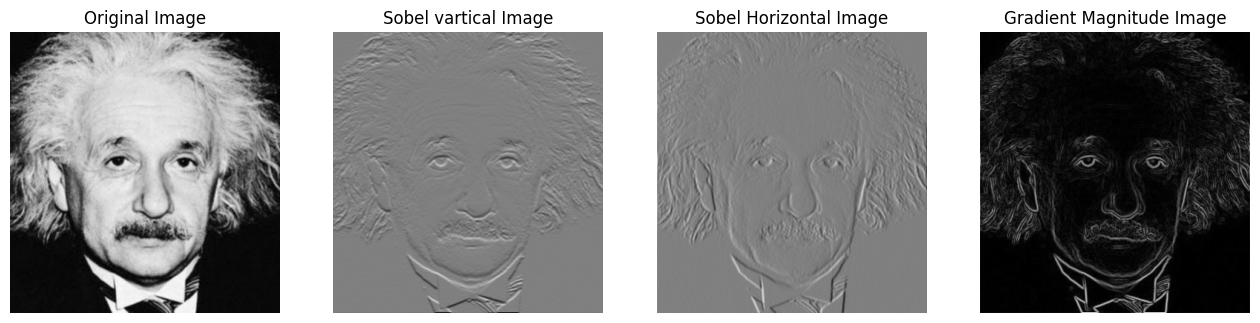

In [34]:
# Create arrays to store the gradient components and gradient magnitude
img_xm = np.zeros(im.shape)
img_ym = np.zeros(im.shape)
rows, columns = im.shape
im_g = np.zeros((im.shape[0],im.shape[1]),np.uint8)

# Carry out padding
padding = 0
padded = np.full((rows + 2, columns + 2), padding, dtype=np.uint8)

padded[1:rows + 1, 1:columns + 1] = im    # Place the original image in the center of the padded array

# Apply Sobel operators to compute gradient components
for i in range(rows):
    for j in range(columns):
        img_ym[i,j] = np.sum(np.multiply(sobel_h, padded[i:i + 3, j:j + 3]))
        
for i in range(rows):    
    for j in range(columns):
        img_xm[i,j] = np.sum(np.multiply(sobel_v, padded[i:i + 3, j:j + 3]))
              
# Gradient Magnitude Kernel
img_grad_m = np.sqrt(img_xm**2 + img_ym**2)

# Display the original grayscale image , image filtered with the vertical Sobel operator, image filtered with the horizontal Sobel operator, and the gradient magnitude            
fig, ax = plt.subplots(1, 4, figsize=(16,16))
ax[0].imshow(im, cmap = 'gray', vmin = 0, vmax = 255),ax[0].set_title("Original Image"),ax[0].axis('off')
ax[1].imshow(img_xm, cmap = 'gray',vmin = -1020, vmax = 1020),ax[1].set_title("Sobel vartical Image"),ax[1].axis('off')
ax[2].imshow(img_ym, cmap = 'gray',vmin = -1020, vmax = 1020),ax[2].set_title("Sobel Horizontal Image"),ax[2].axis('off')
ax[3].imshow(img_grad_m, cmap = 'gray'),ax[3].set_title("Gradient Magnitude Image"),ax[3].axis('off')

plt.show()

(7) c)) Using the property
carry out Sobel filtering

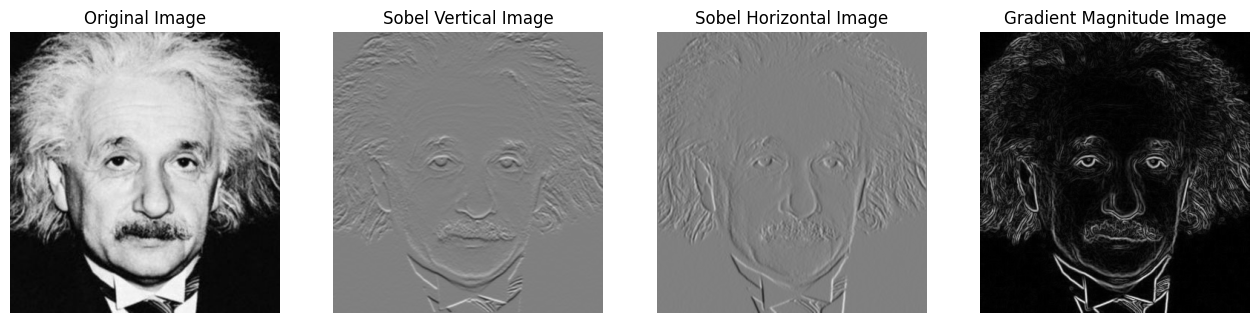

In [35]:
# Load the image and ensure it's not None
im = cv.imread("einstein.png")
assert im is not None

# Convert the image to grayscale and cast it as float for computations
im = cv.cvtColor(im,cv.COLOR_BGR2GRAY).astype(float)

# Define the Sobel horizontal and vertical kernels
sobel_h_kernel = np.array([1,2,1], dtype=np.float32)
sobel_v_kernel = np.array([1,0,-1], dtype=np.float32)

# Apply the separable convolution using the Sobel kernels to compute gradient components
im1 = cv.sepFilter2D(im, -1, sobel_h_kernel, sobel_v_kernel)
im2 = cv.sepFilter2D(im, -1, sobel_v_kernel, sobel_h_kernel)
img_grad_p = np.sqrt(im1**2 + im2**2)     # Gradient magnitude

fig, ax = plt.subplots(1,4, figsize=(16,16))
# Display the original grayscale image, image filtered with the Sobel vertical kernel,image filtered with the Sobel horizontal kernel, and the gradient magnitude
ax[0].imshow(im, cmap='gray', vmin=0, vmax=255), ax[0].set_title("Original Image"), ax[0].axis("off")
ax[1].imshow(im1, cmap='gray', vmin=-1020, vmax=1020), ax[1].set_title("Sobel Vertical Image"),  ax[1].axis("off")
ax[2].imshow(im2, cmap='gray', vmin=-1020, vmax=1020), ax[2].set_title("Sobel Horizontal Image"), ax[2].axis("off")
ax[3].imshow(img_grad_p, cmap = 'gray'),ax[3].set_title("Gradient Magnitude Image"),ax[3].axis('off')

plt.show()    

8.  Write a program to zoom images by a given factor s ∈ (0,10]. You must use a function to zoom the image, which can handle
(a) nearest-neighbor, and
(b) bilinear interpolation.
I have included four images, two large originals, and there zoomed-out versions. Test you algorithm by
computing the normalized sum of squared difference (SSD) when you scale-up the given small images by a
factor of 4 by comparing with the original images.

SSD Nearest-Neighbor Zoome: 0.0001830374980420635
SSD Bilinear Interpola: 0.00016429053061856538


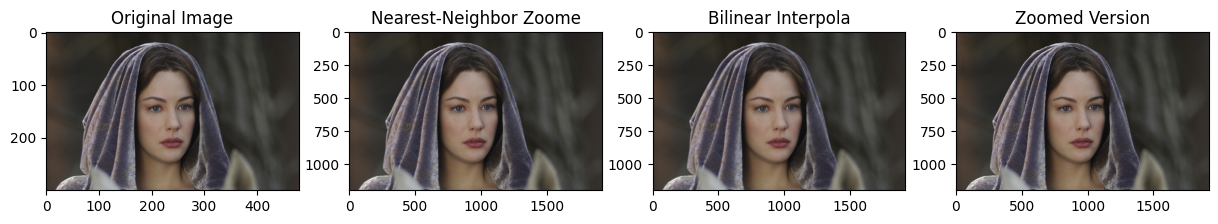

SSD Nearest-Neighbor Zoome: 0.0004698807527731496
SSD Bilinear Interpola: 0.0004888167863974442


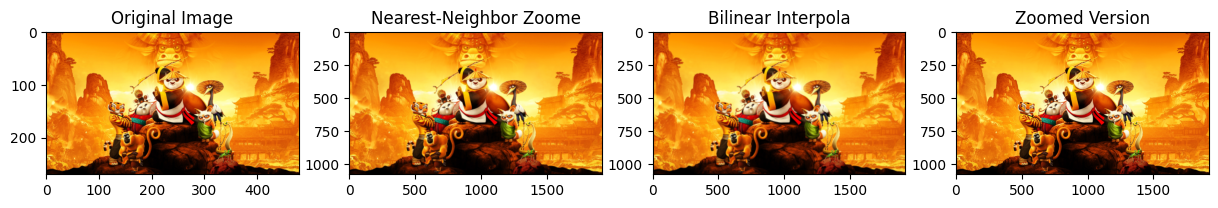

SSD Nearest-Neighbor Zoome: 0.00043005217469442824
SSD Bilinear Interpola: 0.00043928369146882653


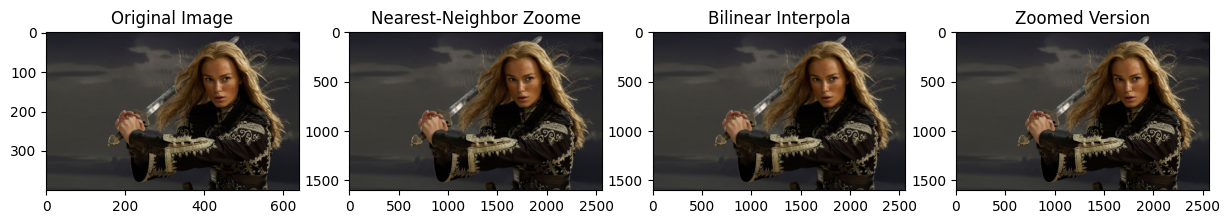

In [36]:
# List of filenames for original and zoomed out images
originals = [ "im02small.png",  "im06small.png", "im07small.png"]
zoomed_outs = [ "im02.png","im06.png","im07.png" ]

# Function to perform zoom using nearest-neighbor interpolation
def zoom_nearest_neighbour(scale, image):
    rows = int(scale*image.shape[0])
    columns = int(scale*image.shape[1])
    
    zoomed = np.zeros((rows,columns,3),dtype = image.dtype)
    for i in range(rows):
        for j in range(columns):
            zoomed[i,j] = image[int(i/scale),int(j/scale)]
    return zoomed

# Function to perform zoom using bilinear interpolation
def zoom_bilinear_interpolation(scale, image):
    rows = int(scale*image.shape[0])
    columns = int(scale*image.shape[1])
    
    zoomed = cv.resize(image,(columns,rows),interpolation = cv.INTER_LINEAR)
    return zoomed

# Function to compute Sum of Squared Differences (SSD) between two images
def SSD(img1,img2):
    val = np.sum(((img1[:,:]-img2[:,:])**2)/(3*255**2))/(img1.shape[0]*img1.shape[1])
    return val

scale=4   # Desired scale for zooming

for i in range(3):

    # Load the original and zoomed out images
    img = cv.imread(originals[i])
    img1 = cv.imread(zoomed_outs[i])

    # Perform nearest-neighbor zoom and compute SSD
    near_img = zoom_nearest_neighbour(scale, img)
    ssd = SSD(img1,near_img)
    print("SSD Nearest-Neighbor Zoome:",ssd)

    # Perform bilinear interpolation zoom and compute SSD
    bilinear_img = zoom_bilinear_interpolation(scale, img)
    ssd = SSD(img1,bilinear_img)
    print("SSD Bilinear Interpola:",ssd)

    # Display the original, zoomed images, and the zoomed version
    fig, ax = plt.subplots(1,4, figsize=(15,10))
    ax[0].imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB)), ax[0].set_title("Original Image")
    ax[1].imshow(cv.cvtColor(near_img,cv.COLOR_BGR2RGB)), ax[1].set_title("Nearest-Neighbor Zoome")
    ax[2].imshow(cv.cvtColor(bilinear_img,cv.COLOR_BGR2RGB)), ax[2].set_title("Bilinear Interpola")
    ax[3].imshow(cv.cvtColor(img1,cv.COLOR_BGR2RGB)), ax[3].set_title("Zoomed Version")
    plt.show()


**When employing nearest neighbor zooming, the enlarged image appears pixelated due to the replication of pixels. In contrast, bilinear interpolation results in a smoother zoomed image, avoiding the pixelation. Bilinear interpolation yields a lower sum of squared differences (SSD) compared to nearest neighbor zooming.

9. . Fig. 8
shows a flower image with both the foreground and background are in focus.
(a) Use grabCut to segment the image. Show the final segmentation mask, foreground image, and background image.
(b) Produce an enhanced image with a substantially blurred background. Display the original image alongside the enhanced image.



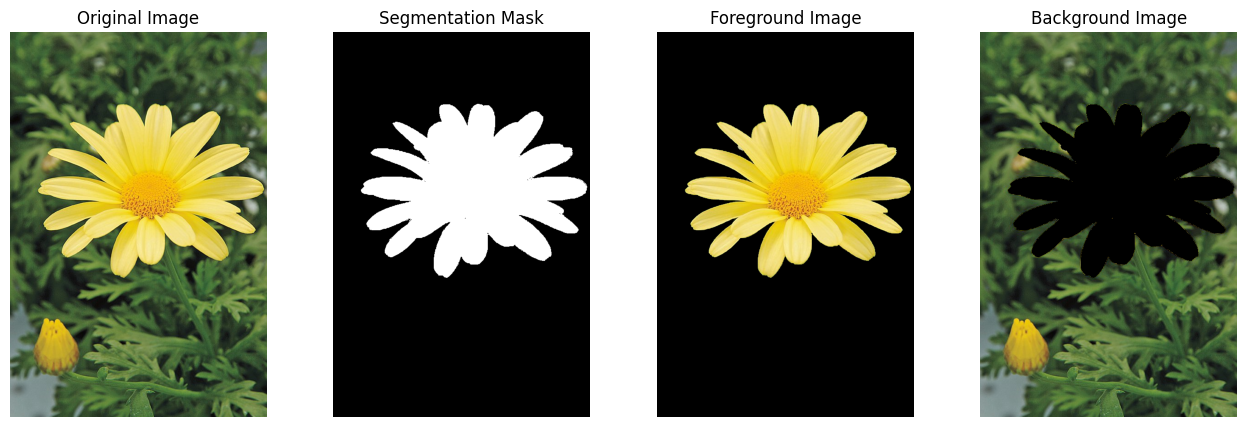

In [37]:
# Load the image
im = cv.imread("daisy.jpg", cv.IMREAD_COLOR)
im_original = im.copy()

# Create an empty mask of the same size as the image
mask = np.zeros(im.shape[:2], np.uint8)
rect = (10, 100, 550, 530)   # Format: (x, y, width, height)

# Initialize arrays for GrabCut's foreground and background models
fgdModel = np.zeros((1, 65), np.float64)
bgdModel = np.zeros((1, 65), np.float64)

# Apply GrabCut algorithm to segment the image
cv.grabCut(im, mask, rect, bgdModel, fgdModel, 5, cv.GC_INIT_WITH_RECT)

# Create a binary segmentation mask based on GrabCut's output
mask1 = np.where((mask==0) | (mask==2), 0, 1).astype("uint8")
im_fgd = im*mask1[:, :, np.newaxis]
mask2 = np.where((mask==1) | (mask==3), 0, 1).astype("uint8")
im_bgd = im*mask2[:, :, np.newaxis]

# Display the original image, segmentation mask, foreground image, and background image
fig, ax = plt.subplots(1, 4, figsize=(16, 5))
ax[0].imshow(cv.cvtColor(im_original, cv.COLOR_BGR2RGB)),ax[0].set_title("Original Image"),ax[0].axis("off")
ax[1].imshow(mask1, cmap = "gray"),ax[1].set_title("Segmentation Mask"),ax[1].axis("off")
ax[2].imshow(cv.cvtColor(im_fgd, cv.COLOR_BGR2RGB)),ax[2].set_title("Foreground Image"),ax[2].axis("off")
ax[3].imshow(cv.cvtColor(im_bgd, cv.COLOR_BGR2RGB)),ax[3].set_title("Background Image"),ax[3].axis("off")
plt.show()

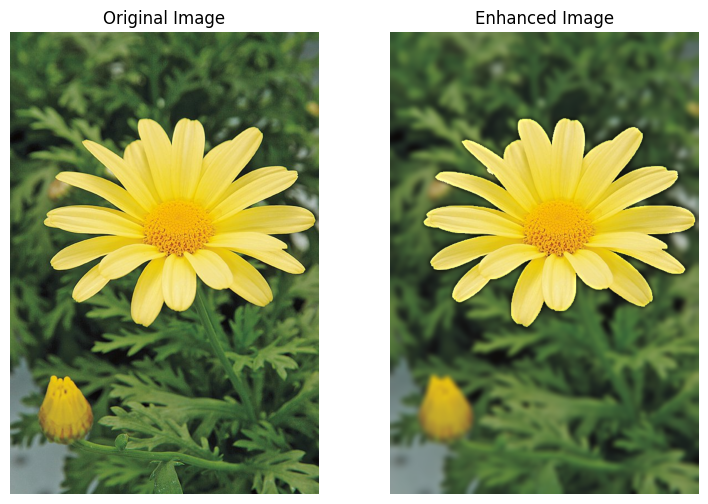

In [38]:
im_blurred = cv.GaussianBlur(im_bgd, (15, 15),5)   # Apply Gaussian blur to the background image
im_enhanced = cv.add(im_blurred, im_fgd)      # Add the blurred background image and the foreground image

# Display the original image and the enhanced image
fig, ax = plt.subplots(1, 2, figsize=(9, 6))
ax[0].imshow(cv.cvtColor(im_original, cv.COLOR_BGR2RGB)),ax[0].set_title("Original Image"),ax[0].axis("off")
ax[1].imshow(cv.cvtColor(im_enhanced, cv.COLOR_BGR2RGB)),ax[1].set_title("Enhanced Image"),ax[1].axis("off")
plt.show()

(9) (c) Why is the background just beyond the edge of the flower quite dark in the enhanced image?

In the enhanced image, the darkening of the background beyond the flower's edge occurs due to the Gaussian blur applied to the background region. This blur reduces pixel intensities by averaging nearby pixels. Consequently, the blurred background pixels are mixed with darker regions from the original background, as well as potentially some parts of the flower's edges. This results in a gradual transition between the sharp foreground (flower) and the blurred background. As a result of pixel averaging, the background adjacent to the flower may appear darker compared to the original image. This effect is more noticeable if the background initially contains darker regions, leading to their blending with neighboring areas during the blurring process.